# 4 Pre-Processing Data<a id='4_Pre-Processing_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing Data](#4_Pre-Processing_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
      * [4.4.1 Checking Null Values](#4.4.1_Checking_Null_Values)
      * [4.4.2 Checking Categorical Variable and their unique values](#4.4.2_Checking_Categorical_Variable_and_their_unique_values)
          * [4.4.2.1 Reducing Conflicting Shapes by changing all to lowercase](#4.4.2.1_Reducing_Conflicting_Shapes_by_changing_all_to_lowercase)
          * [4.4.2.2 Reducing Country labels by categorising all countries with less than 100 sightings to OTHER](#4.4.2.2_Reducing_Country_labels_by_categorising_all_countries_with_less_than_100_sightings_to_OTHER)
          * [4.4.2.3 Extracting Month, Day & hour from Datetime column & dropping it](#Extracting_Month,_Day_&_hour_from_Datetime_column_&_dropping_it)
      * [4.4.3 Creating datasets for Modelling](#4.4.3_Creating_datasets_for_Modelling)
          * [4.4.3.1 Dataset 1 All Features](#4.4.3.1_Dataset_1_All_Features)
          * [4.4.3.2 Dataset 2 - without City & State Columns](#4.4.3.2_Dataset_2_-_without_City_&_State_Columns)
  * [4.5 Additional Data Exploration](#4.5_Additional_Data_Exploration)
      * [4.5.1 Average Duration by Country](#4.5.1_Average_Duration_by_Country)
      * [4.5.2 Average Duration by Shape](#4.5.2_Average_Duration_by_Shape)
      * [4.5.3 Average Duration by Month](#4.5.3_Average_Duration_by_Month)
      * [4.5.4 Duration by Latitude & Longitude](#4.5.4_Duration_by_Latitude_&_Longitude)
  * [4.6 Encoding Categorical Features](#4.6_Encoding_Categorical_Features)
      * [4.6.1 Ordinal Encoder](#4.6.1_Ordinal_Encoder)
      * [4.6.2 One-Hot Encoder](#4.6.2_One-Hot_Encoder)
      * [4.6.3 Binary Encoder](#4.6.3_Binary_Encoder)
      * [4.6.4 BaseN Encoder](#4.6.4_BaseN_Encoder)
      * [4.6.5 Hashing Encoder](#4.6.5_Hashing_Encoder)
      * [4.6.6 Encoding Summary](#4.6.6_Encoding_Summary)
  * [4.7 Train/Test Split](#4.7_Train/Test_Split)
      * [4.7.1 For Original Dataset](#4.7.1_For_Original_Dataset)
      * [4.7.2 For less featured](#4.7.2_For_less_featured)
  * [4.8 Preprocessing Summary](#4.8_Preprocessing_Summary)

## 4.2 Introduction<a id='4.2_Introduction'></a>

In preceding notebooks, performed preliminary assessments of data quality and refined the question to be answered. You found a small number of data values that gave clear choices about whether to replace values or drop a whole row. You determined that predicting the adult weekend ticket price was your primary aim. You threw away records with missing price data, but not before making the most of the other available data to look for any patterns between the states. You didn't see any and decided to treat all states equally; the state label didn't seem to be particularly useful. 

We explore UFO Sightings data by cleaning and transforminf it and also visualized some relationships between shape, duration, datetime and location

Our purpose is to predict duration using various regression models and test their assessment as to which gives us the best prediction


## 4.3 Imports<a id='4.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file

## 4.4 Load Data<a id='4.4_Load_Data'></a>

 After performing wrangling and EDA on our data in the previous two notebooks, some more exploration as well encoding for categorical variables is performed in this notebook so as to get more insights from our data before proceeding to Modelling

In [3]:
data = pd.read_csv('ufo_c.csv', parse_dates = ['Date_time', 'Date_posted'], low_memory = False)

In [4]:
data.head()

,Date_time,Duration_minutes,Description,Date_posted,lat_long,Country,State,City,Shape_final,Year,Month,sh,lat,long
0,1949-10-10 20:30:00,45.00,This event took place in early fall around 194...,2004-04-27,"(29.8830556, -97.9411111)",US,Texas,San Marcos,['cylinder'],1949,October,cylinder,29.883056,-97.941111
1,1949-10-10 21:00:00,60.00,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,"(29.38421, -98.581082)",US,Texas,Lackland Air Force Base,['light'],1949,October,light,29.384210,-98.581082
2,1955-10-10 17:00:00,0.33,Green/Orange circular disc over Chester&#44 En...,2008-01-21,"(53.2, -2.916667)",GB,England,Blacon,['circle'],1955,October,circle,53.200000,-2.916667
3,1956-10-10 21:00:00,30.00,My older brother and twin sister were leaving ...,2004-01-17,"(28.9783333, -96.6458333)",US,Texas,Edna,['circle'],1956,October,circle,28.978333,-96.645833
4,1960-10-10 20:00:00,15.00,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,"(21.4180556, -157.8036111)",US,Hawaii,Kane'ohe,['light'],1960,October,light,21.418056,-157.803611


### 4.4.1 Checking Null Values<a id='4.4.1_Checking_Null_Values'></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77544 entries, 0 to 77543
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_time         77544 non-null  datetime64[ns]
 1   Duration_minutes  77544 non-null  float64       
 2   Description       77544 non-null  object        
 3   Date_posted       77544 non-null  datetime64[ns]
 4   lat_long          77544 non-null  object        
 5   Country           77544 non-null  object        
 6   State             77544 non-null  object        
 7   City              77544 non-null  object        
 8   Shape_final       77544 non-null  object        
 9   Year              77544 non-null  int64         
 10  Month             77544 non-null  object        
 11  sh                77544 non-null  object        
 12  lat               77544 non-null  float64       
 13  long              77544 non-null  float64       
dtypes: datetime64[ns](2), 

 After loading our dataset, I checked for any missing values as well as if our datat types are correct or not. As observed, Both dates are in DATETIME format, Our target column Duration is numerical float, Shape, country, City, State are categorical. All features have no null values 

<b> In below cell, Just selecting the required columns for our exploration and encoding</b>

In [6]:
data_m = data[['Date_time', 'Duration_minutes', 'Country', 'State', 'City', 'Year', 'Month', 'sh', 'lat','long']]

In [7]:
data_m.head()

,Date_time,Duration_minutes,Country,State,City,Year,Month,sh,lat,long
0,1949-10-10 20:30:00,45.00,US,Texas,San Marcos,1949,October,cylinder,29.883056,-97.941111
1,1949-10-10 21:00:00,60.00,US,Texas,Lackland Air Force Base,1949,October,light,29.384210,-98.581082
2,1955-10-10 17:00:00,0.33,GB,England,Blacon,1955,October,circle,53.200000,-2.916667
3,1956-10-10 21:00:00,30.00,US,Texas,Edna,1956,October,circle,28.978333,-96.645833
4,1960-10-10 20:00:00,15.00,US,Hawaii,Kane'ohe,1960,October,light,21.418056,-157.803611


In [8]:
data_m.shape

(77544, 10)

Our final dataset has 11 features and around 77500 rows

### 4.4.2 Checking Categorical Variable and their unique values<a id='4.4.2_Checking_Categorical_Variable_and_their_unique_values'></a>

<b> Checking Unique values in Country Column</b>

In [9]:
data_m['Country'].nunique()

157

Country Column has <b> 157 </b> Unique names 

In [10]:
data_m['State'].nunique()

796

 State Column has <b>796 </b>Unique names

In [11]:
data_m['City'].nunique()

10444

 City Column has more than <b>10000</b> unique names which is too much too encode

In [12]:
data_m['sh'].nunique()

51

In [13]:
data_m['sh'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'Circle', 'Changing',
       'Disk', 'disk', 'Round', 'fireball', 'unknown', 'Light', 'Sphere',
       'other', 'oval', 'cigar', 'rectangle', 'chevron', 'triangle',
       'formation', 'Chevron', 'Triangle', 'delta', 'changing', 'Cigar',
       'Egg', 'flash', 'Oval', 'Cylinder', 'Flash', 'Formation', 'cross',
       'Crescent', 'Fireball', 'Cross', 'Diamond', 'teardrop', 'egg',
       'Rectangle', 'Changed', 'diamond', 'Delta', 'cone', 'Cone',
       'Hexagon', 'Flare', 'Teardrop', 'Pyramid', 'pyramid', 'flare',
       'round'], dtype=object)

 Shape column has <b>51</b> unique values but as can be seen that some values are same but they only differ in their first alphabet being in different casesso below I have converted all shape values to lowercase to eliminate the duplication of same values

#### 4.4.2.1 Reducing Conflicting Shapes by changing all to lowercase<a id='4.4.2.1_Reducing_Conflicting_Shapes_by_changing_all_to_lowercase'></a>

In [14]:
# Changing shape values to lowercase

data_m.loc[:,'sh'] = data_m['sh'].str.lower()

D:\Anacon\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
data_m['sh'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'changing', 'disk',
       'round', 'fireball', 'unknown', 'other', 'oval', 'cigar',
       'rectangle', 'chevron', 'triangle', 'formation', 'delta', 'egg',
       'flash', 'cross', 'crescent', 'diamond', 'teardrop', 'changed',
       'cone', 'hexagon', 'flare', 'pyramid'], dtype=object)

In [17]:
data_m['sh'].nunique()

28

As can be seen above after changing to lower case our number of shapes has gone down from 51 to 28 and it can be noticed that the
top shape is light with as more than 23000 sightings followed by traingle and circle

#### 4.4.2.2 Reducing Country labels by categorising all countries with less than 100 sightings to OTHER<a id='4.4.2.2_Reducing_Country_labels_by_categorising_all_countries_with_less_than_100_sightings_to_OTHER'></a>

As we saw that country column has 157 unique values so to reduce the categories, I have put all the countries having less than 100 sightings into one single category called  "OTHER" . Follwing steps are performed below:
* First I chech the each value and its count as assign it to counts
* I create a mask to get the index of countries from value count variable 'COUNTS' which have less than 100 count
* I assign 'OTHER' to all the mask index countries

In [19]:
counts = data_m['Country'].value_counts()

In [20]:
mask_1 = data_m['Country'].isin(counts[counts < 100].index)

In [21]:
data_m['Country'][mask_1] = 'OTHER'

D:\Anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anacon\lib\site-packages\pandas\core\series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [22]:
data_m['Country'].unique()

array(['US', 'GB', 'OTHER', 'GH', 'CA', 'AU', 'MX', 'IN', 'DE', 'NL'],
      dtype=object)

In [23]:
data_m['Country'].nunique()

10

After performing some transformation on country column as mentioned above, we now have 10 unique values/Categories in our country column.

Since State and City Columns have a lot of unique values so its better to drop these columns although I will keep the original dataset with all its columns incase some of our model requires all features

In below cell just converting string month value to integer type

In [24]:
data_m['Month'] = data_m['Date_time'].dt.month 

D:\Anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 4.4.2.3 Extracting Month, Day & hour from Datetime column & dropping it<a id='4.4.2.3_Extracting_Month,_Day_&_hour_from_Datetime_column_&_dropping_it'></a>

Extracting Day and hour from datetime column in order to have more numerical features as regression models don't accept datetime format. After Extracting the Date_time Column is dropped

In [25]:
data_m['Day'] = data_m['Date_time'].dt.day

D:\Anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
data_m['Hour'] = data_m['Date_time'].dt.hour

D:\Anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
data_m = data_m.drop(['Date_time'], axis = 1) 

In [28]:
data_m.head()

,Duration_minutes,Country,State,City,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,Texas,San Marcos,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,Texas,Lackland Air Force Base,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,England,Blacon,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,Texas,Edna,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,Hawaii,Kane'ohe,1960,10,light,21.418056,-157.803611,10,20


In [29]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77544 entries, 0 to 77543
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration_minutes  77544 non-null  float64
 1   Country           77544 non-null  object 
 2   State             77544 non-null  object 
 3   City              77544 non-null  object 
 4   Year              77544 non-null  int64  
 5   Month             77544 non-null  int64  
 6   sh                77544 non-null  object 
 7   lat               77544 non-null  float64
 8   long              77544 non-null  float64
 9   Day               77544 non-null  int64  
 10  Hour              77544 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 6.5+ MB


This is our original final dataset with all features and no null values. In few follwing cells, I have creating one more dataset without State and City Columns just to have a more simplified dataset with less categorical variables

### 4.4.3 Creating datasets for Modelling<a id='4.4.3_Creating_datasets_for_Modelling'></a>

#### 4.4.3.1 Dataset 1 All Features<a id='4.4.3.1_Dataset_1_All_Features'></a>

In [30]:
data_m.head()

,Duration_minutes,Country,State,City,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,Texas,San Marcos,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,Texas,Lackland Air Force Base,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,England,Blacon,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,Texas,Edna,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,Hawaii,Kane'ohe,1960,10,light,21.418056,-157.803611,10,20


<b>This is our first dataset 'data_m'. which has 11 features</b>

#### 4.4.3.2 Dataset 2 - without City & State Columns<a id='4.4.3.2_Dataset_2_-_without_City_&_State_Columns'></a>

data_1 = data_m.drop(['State', 'City'], axis = 1)

In [32]:
data_1.head()

,Duration_minutes,Country,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,1960,10,light,21.418056,-157.803611,10,20


In [33]:
data_1.shape

(77544, 9)

<b> This is our second dataset 'data_1' after dropping State and City Columns. As observed this dataset only has two categorical 
features namely Country with 10 categories and Shape with 28 categories, rest all columns are numerical either 
float type or integer type.

This dataset has 9 feature and 77000 rows</b>

## 4.5 Additional Data Exploration<a id='4.5_Additional_Data_Exploration'></a>

Below mentioned explorations are to visualize duartion our target variable with other feature. Mostly it is bivariate, idea is to see how other features are related to duration in terms of average duration or max duration

In [35]:
data_2 = data_1.copy()

### 4.5.1 Average Duration by Country<a id='4.5.1_Average_Duration_by_Country'></a>

Lets check max and average duration based on countries

In [41]:
data_country = data_2.groupby('Country').agg(Max_Duration = ('Duration_minutes', max), Avg_Duration = ('Duration_minutes', np.mean))

In [46]:
data_country = data_country.sort_values(by = 'Avg_Duration', ascending = False)

In [49]:
data_country.head()

,Max_Duration,Avg_Duration
Country,,
MX,1080.0,27.089585
GH,1440.0,19.036849
IN,300.0,17.041643
DE,840.0,17.024341
US,5760.0,15.151452


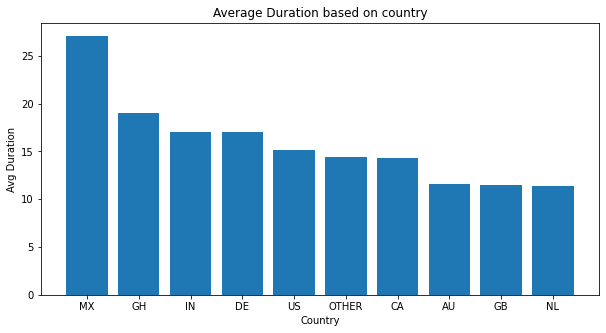

In [51]:
plt.subplots(figsize=(10, 5))
plt.bar(data_country.index, data_country.Avg_Duration)
plt.xlabel('Country')
plt.ylabel('Avg Duration')
plt.title('Average Duration based on country');

As can be seen above the highest average duration for UFO Sighting is observed in Mexico with around 27 minutes follwed by Ghana at 19 and India at 17 minutes respectively

### 4.5.2 Average Duration by Shape<a id='4.5.2_Average_Duration_by_Shape'></a>

<b> Lets compare shape and duration</b>

In [52]:
data_shape = data_2.groupby('sh').agg(Max_Duration = ('Duration_minutes', max), Avg_Duration = ('Duration_minutes', np.mean), Total_Duration = ('Duration_minutes', sum))

In [57]:
# Sorting it by Av g Duration in descending order

data_shape = data_shape.sort_values(by = 'Avg_Duration', ascending = False)

In [58]:
data_shape.head(10)

,Max_Duration,Avg_Duration,Total_Duration
sh,,,
changing,2640.0,29.822803,53084.59
changed,4320.0,27.965222,11941.15
egg,4320.0,22.329778,14112.42
cone,300.0,18.932337,4941.34
other,4500.0,17.936306,79188.79
diamond,1440.0,17.760058,18488.22
unknown,1800.0,17.327576,69986.08
circle,2640.0,16.949370,92543.56
oval,5760.0,16.072799,50934.70


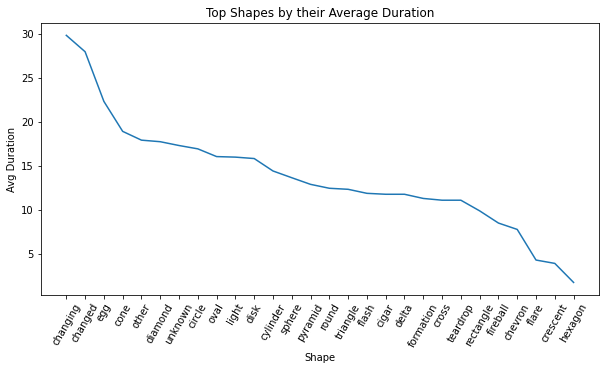

In [62]:
plt.subplots(figsize=(10, 5))
plt.plot(data_shape.index, data_shape.Avg_Duration)
plt.xlabel('Shape')
plt.xticks(rotation = 60)
plt.ylabel('Avg Duration')
plt.title('Top Shapes by their Average Duration');

When it comes to shapes , changing/changed leads with highest avg duration of UFO Sighting at 29 minutes floowed by Egg Shape and Cone Shape

### 4.5.3 Average Duration by Month<a id='4.5.3_Average_Duration_by_Month'></a>

In [88]:
data_mont = data_2.groupby('Month').agg(Avg_Duration = ('Duration_minutes', np.mean), Total_Duration = ('Duration_minutes', sum))

In [89]:
data_mont = data_mont.sort_values(by = 'Avg_Duration', ascending = False)

In [90]:
data_mont.head(12)

,Avg_Duration,Total_Duration
Month,,
8,16.715483,139774.87
2,16.481327,73770.42
5,15.919023,81489.48
10,15.849868,113881.30
9,15.224194,111776.03
12,15.088627,83213.78
3,14.935534,78426.49
6,14.743506,115648.06
7,14.530905,133495.42


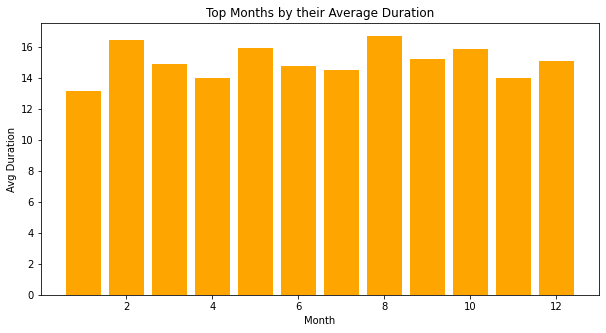

In [93]:
plt.subplots(figsize=(10, 5))
plt.bar(data_mont.index, data_mont.Avg_Duration, color = 'orange')
plt.xlabel('Month')
#plt.xticks(rotation = 60)
plt.ylabel('Avg Duration')
plt.title('Top Months by their Average Duration');

As senn above, when it comes to avegae duration August and February are almost at tie with 16 minutes of average duration.
August also leads where UFOs were seen for most of the times follwed by July

### 4.5.4 Duration by Latitude & Longitude<a id='4.5.4 Duration_by_Latitude_&_Longitude'></a>

D:\Anacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


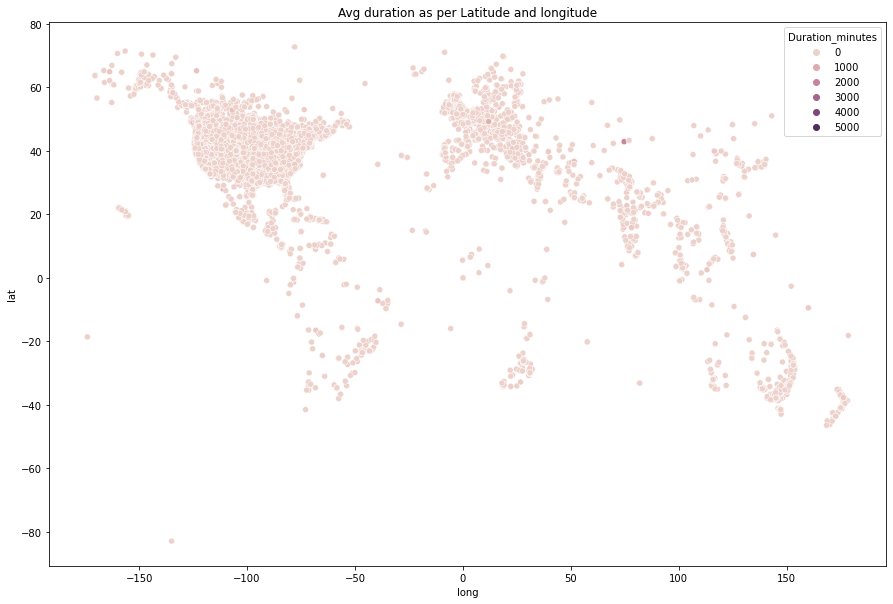

In [134]:
plt.subplots(figsize=(15, 10))
sns.scatterplot('long' , 'lat', data = data_2, hue = 'Duration_minutes')

plt.title('Duration as per Latitude and longitude')
plt.show()

As observed above, most of our sightings are in US follwed by Europe, Indiaand some in australia and Latin America

Most of the duration are less than 100 repsented by light colors

<b> After bit of exploration , lets encode the categorical variables to get all numerical columns for our furthur modelling</b>

## 4.6 Encoding Categorical Features<a id='4.6_Encoding_Categorical_Features'></a>

### 4.6.1 Ordinal Encoder<a id='4.6.1_Ordinal_Encoder'></a>

 <b> Approach 1 - Ordinal Encoding or Label Encoding </b> - It is used to transform non-numerical labels into numerical labels (or nominal categorical variables). Numerical labels are always between 1 and the number of classes. The labels chosen for the categories have no relationship. So categories that have some ties or are close to each other lose such information after encoding. The first unique value in your column becomes 1, the second becomes 2, the third becomes 3, and so on..

In [97]:
import category_encoders as ce

X = data_1[['Country','Year','Month','sh','lat','long','Day','Hour']]
y = data_m['Duration_minutes']

ce_ordinal = ce.OrdinalEncoder(cols = ['Country', 'sh'])

X_OR = ce_ordinal.fit_transform(X)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [98]:
X_OR.head()

,Country,Year,Month,sh,lat,long,Day,Hour
0,1,1949,10,1,29.883056,-97.941111,10,20
1,1,1949,10,2,29.384210,-98.581082,10,21
2,2,1955,10,3,53.200000,-2.916667,10,17
3,1,1956,10,3,28.978333,-96.645833,10,21
4,1,1960,10,2,21.418056,-157.803611,10,20


### 4.6.2 One-Hot Encoder<a id='4.6.2_One-Hot_Encoder'></a>

<b> Approach 2 - One Hot Encoding </b> -  we map each category to a vector that contains 1 and 0 denoting the presence of the feature or not. The number of vectors depends on the categories which we have in our dataset. For high cardinality features, this method produces a lot of columns that slows down the learning of the model significantly.

Two ways - 
* Pandas - .get_dummies() method
* Scikit Learn's OneHotEncoder()

In [103]:
X = data_1[['Country','Year','Month','sh','lat','long','Day','Hour']]
y = data_m['Duration_minutes']

ce_OHE = ce.OneHotEncoder(cols=['Country', 'sh'])

X_OHE = ce_OHE.fit_transform(X)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [104]:
X_OHE.head()

,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Country_8,Country_9,Country_10,...,sh_23,sh_24,sh_25,sh_26,sh_27,sh_28,lat,long,Day,Hour
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,29.883056,-97.941111,10,20
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,29.384210,-98.581082,10,21
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,53.200000,-2.916667,10,17
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,28.978333,-96.645833,10,21
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,21.418056,-157.803611,10,20


<b> One hot Encoding using Pandas get_dummies method</b>

In [101]:
# Using Pandas Dummy method

X = data_1[['Country','Year','Month','sh','lat','long','Day','Hour']]
y = data_m['Duration_minutes']

X_dumm = pd.get_dummies(data = X)

In [102]:
X_dumm.head()

,Year,Month,lat,long,Day,Hour,Country_AU,Country_CA,Country_DE,Country_GB,...,sh_light,sh_other,sh_oval,sh_pyramid,sh_rectangle,sh_round,sh_sphere,sh_teardrop,sh_triangle,sh_unknown
0,1949,10,29.883056,-97.941111,10,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1949,10,29.384210,-98.581082,10,21,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1955,10,53.200000,-2.916667,10,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1956,10,28.978333,-96.645833,10,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1960,10,21.418056,-157.803611,10,20,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


As Get Dummies method changes categories to binary 0, 1 depending on number of categories, we can see that this has created 44
columns after making each column a feature with value 0 or 1. SK learn's One hot Encoder and Pandas get_dummies function work in the same manner

### 4.6.3 Binary Encoder<a id='4.6.3_Binary_Encoder'></a>

<b>Approach 3 - Binary Encoder </b>- First, the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This is useful when you have a large number of categories

In [105]:
X = data_1[['Country','Year','Month','sh','lat','long','Day','Hour']]
y = data_m['Duration_minutes']

ce_Bin = ce.BinaryEncoder(cols=['Country', 'sh'])

X_Bin = ce_Bin.fit_transform(X)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [106]:
X_Bin.head()

,Country_0,Country_1,Country_2,Country_3,Country_4,Year,Month,sh_0,sh_1,sh_2,sh_3,sh_4,sh_5,lat,long,Day,Hour
0,0,0,0,0,1,1949,10,0,0,0,0,0,1,29.883056,-97.941111,10,20
1,0,0,0,0,1,1949,10,0,0,0,0,1,0,29.384210,-98.581082,10,21
2,0,0,0,1,0,1955,10,0,0,0,0,1,1,53.200000,-2.916667,10,17
3,0,0,0,0,1,1956,10,0,0,0,0,1,1,28.978333,-96.645833,10,21
4,0,0,0,0,1,1960,10,0,0,0,0,1,0,21.418056,-157.803611,10,20


Binary is more effective if we have more unique values in categorical features, it has already reduced number of features
44 to 17 which is more suitable for our modelling purposes

### 4.6.4 BaseN Encoder<a id='4.6.4_BaseN_Encoder'></a>

<b> Approach 4 - BaseN Encoding </b>- In binary encoding, we convert the integers into binary i.e base 2. BaseN allows us to convert the integers with any value of the base. So, if you have something like city_name in your dataset which could be in thousands then it is advisable to use BaseN as it will reduce the dimensions further as you get after using binary-encoding.

In [108]:
# For dataset 1

X = data_1[['Country','Year','Month','sh','lat','long','Day','Hour']]
y = data_m['Duration_minutes']

ce_BN = ce.BaseNEncoder(cols=['Country', 'sh'], base = 3)

X_BN = ce_BN.fit_transform(X)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [111]:
X_BN.sample(5)

,Country_0,Country_1,Country_2,Country_3,Year,Month,sh_0,sh_1,sh_2,sh_3,sh_4,lat,long,Day,Hour
73568,0,0,0,1,2011,9,0,0,1,0,0,44.923889,-92.959167,20,1
75559,0,0,0,1,2012,9,0,0,1,0,2,39.114167,-94.627222,28,19
27999,0,0,1,2,2004,2,0,0,0,1,1,53.633333,-113.633333,28,18
11894,0,0,0,1,2014,1,0,0,2,0,0,40.995278,-74.012500,12,17
24821,0,0,0,1,2013,2,0,0,0,2,2,26.933889,-80.094444,10,22


In [112]:
# For dataset original

X = data_m[['Country','Year','Month','State','City','sh','lat','long','Day','Hour']]
y = data_m['Duration_minutes']

ce_BNO = ce.BaseNEncoder(cols=['Country', 'sh', 'State','City'], base = 10)

X_BNO = ce_BNO.fit_transform(X)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [113]:
X_BNO.head()

,Country_0,Country_1,Year,Month,State_0,State_1,State_2,State_3,City_0,City_1,...,City_3,City_4,City_5,sh_0,sh_1,sh_2,lat,long,Day,Hour
0,0,1,1949,10,0,0,0,1,0,0,...,0,0,1,0,0,1,29.883056,-97.941111,10,20
1,0,1,1949,10,0,0,0,1,0,0,...,0,0,2,0,0,2,29.384210,-98.581082,10,21
2,0,2,1955,10,0,0,0,2,0,0,...,0,0,3,0,0,3,53.200000,-2.916667,10,17
3,0,1,1956,10,0,0,0,1,0,0,...,0,0,4,0,0,3,28.978333,-96.645833,10,21
4,0,1,1960,10,0,0,0,3,0,0,...,0,0,5,0,0,2,21.418056,-157.803611,10,20


For our original dataset BaseN Encoder seems to be pretty suitable with keeping base as 10 we have used all the features and have manged to get just 21 features where as City column had more than 10000 values

### 4.6.5 Hashing Encoder<a id='4.6.5_Hashing_Encoder'></a>

<b> Approach 5 - Hashing </b> - It is the process of transformation of a string of characters into a usually shorter fixed-length value using an algorithm that represents the original string. It uses md5 algorithm to convert the string into a fixed-length shorter string that we can define by using the parameter n_components. If you set the parameter to 5 then it doesn’t matter to the algorithm whether the length of your category is 7 or 700, it will convert it into a string of length 5 which will finally give us 5 different columns representing our categorical value

In [116]:
# For dataset 1

X = data_1[['Country','Year','Month','sh','lat','long','Day','Hour']]
y = data_m['Duration_minutes']

ce_HE = ce.HashingEncoder(cols=['Country', 'sh'], n_components = 5)

X_HE = ce_HE.fit_transform(X)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [118]:
X_HE.head()

,col_0,col_1,col_2,col_3,col_4,Year,Month,lat,long,Day,Hour
0,0,0,1,0,1,1949,10,29.883056,-97.941111,10,20
1,0,0,1,0,1,1949,10,29.384210,-98.581082,10,21
2,0,0,1,0,1,1955,10,53.200000,-2.916667,10,17
3,0,0,1,0,1,1956,10,28.978333,-96.645833,10,21
4,0,0,1,0,1,1960,10,21.418056,-157.803611,10,20


### 4.6.6 Encoding Summary<a id='4.6.6_Encoding_Summary'></a>



* I have used 5 approaches for encoding in case of my dataset
* Out of first three approaches which I used on dataset with 9 features, results are ok, While the ordinal encoder yields same 9 features as compare to One-Hot which gave 44 features but sometimes ordinal suits more to categories which have order but out dataset doesn;t have any order for their categories 
* Between next three approaches i.e Binary, BaseN and Hashing, I find BaseN to be the best for our data as we can use it for both of our datasets i.e original and less featured one also

We have Five feature set to train our data
1. X_OR (Ordinal Encoded)
2. X_dumm/X_OHE - (One-Hot Encoded)
3. X_BN (Binary Encoded)
4. X_BNO (BaseN Encoded)
5. X_HE (Hashing Encoded)

For our two datasets, Original with all features, I will use BaseN Encoded feature set
and for dataset without State and City, lets use wither Ordinal or Binary

## 4.7 Train/Test Split<a id='4.7_Train/Test_Split'></a>

Lets Split our dataset into Train and Test data for furthur modelling purposes. For original Dataset I am useing BaseN Encoded Dataset and For shorter I am using Binary Encoded Dataset

### 4.7.1 For Original Dataset<a id='4.7.1_For_Original_Dataset'></a>

In [119]:
X_BNO_train, X_BNO_test, y_train, y_test = train_test_split(X_BNO, y, test_size = .25, random_state = 40)

For Less featured dataset, I am using Binary/Ordinal Encoded Feature set

### 4.7.2 For less featured<a id='4.7.2_For_less_featured'></a>

In [120]:
# binary Encoder

X_BN_train, X_BN_test, y_BN_train, y_BN_test = train_test_split(X_BN, y, test_size = .25, random_state = 40)

In [ ]:
# Ordinal Encoder

In [121]:
X_OR_train, X_OR_test, y_OR_train, y_OR_test = train_test_split(X_OR, y, test_size = .25, random_state = 40)

## 4.8 Preprocessing Summary<a id='4.8_Preprocessing_Summary'></a>



1. We started by checking our cleaned data set for null values and ensuring correct data types
2. We checked for unique values in all the categorical feature that our dataset has, which are Country, State, City and Shape
3. We did some modfication for Country Column to reduce the number of unique values by categorising all countries having less than 100 sightings  into OTHER catwegory
4. We checked other columns auch as City and State both have bery high number of unique values i.e 10000 and 700 respectively
5. We created two datasets one with all the features and other without city and State columns
6. We did some more visualizations in terms of our target variable in respect to other features
7. We encoded out categorical features using 5 encoding techinques to see which gives us the best dataset
8. We selected BaseN Encoder for original dataset abd binary/Ordinal for less featured dataset
9. We split our datasets into train and test set for furthur modelling to be preformed in next notebook
